In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [2]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [3]:
df_dropped_null = df.dropna(axis=0, subset=['view', 'yr_renovated', 'waterfront'])

In [4]:
df_dropped_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 21 columns):
id               15762 non-null int64
date             15762 non-null object
price            15762 non-null float64
bedrooms         15762 non-null int64
bathrooms        15762 non-null float64
sqft_living      15762 non-null int64
sqft_lot         15762 non-null int64
floors           15762 non-null float64
waterfront       15762 non-null float64
view             15762 non-null float64
condition        15762 non-null int64
grade            15762 non-null int64
sqft_above       15762 non-null int64
sqft_basement    15762 non-null object
yr_built         15762 non-null int64
yr_renovated     15762 non-null float64
zipcode          15762 non-null int64
lat              15762 non-null float64
long             15762 non-null float64
sqft_living15    15762 non-null int64
sqft_lot15       15762 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 2.6+ MB


In [5]:
df_dropped_null = df_dropped_null.drop(['sqft_basement', 'zipcode', 'date', 'id'], axis = 1)

In [6]:
df_dropped_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 17 columns):
price            15762 non-null float64
bedrooms         15762 non-null int64
bathrooms        15762 non-null float64
sqft_living      15762 non-null int64
sqft_lot         15762 non-null int64
floors           15762 non-null float64
waterfront       15762 non-null float64
view             15762 non-null float64
condition        15762 non-null int64
grade            15762 non-null int64
sqft_above       15762 non-null int64
yr_built         15762 non-null int64
yr_renovated     15762 non-null float64
lat              15762 non-null float64
long             15762 non-null float64
sqft_living15    15762 non-null int64
sqft_lot15       15762 non-null int64
dtypes: float64(8), int64(9)
memory usage: 2.2 MB


### Direct data model

In [7]:
from sklearn.linear_model import LinearRegression

y = df_dropped_null['price']
X = df_dropped_null.drop(['price'], axis = 1)
linreg = LinearRegression(fit_intercept = False)
linreg.fit(X, y)
print(linreg.score(X, y))

0.6896186716202697


In [8]:
y_predicted = linreg.predict(X)

In [9]:
residuals = y - y_predicted

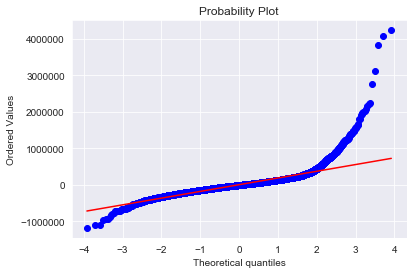

In [10]:
from scipy.stats import probplot

_ = probplot(residuals, plot=plt)

### Data is log transformed

In [11]:
df_log = df_dropped_null.copy()

In [12]:
log_sqft_living = np.log(df_dropped_null['sqft_living'])
log_sqft_lot = np.log(df_dropped_null['sqft_lot'])
log_sqft_above = np.log(df_dropped_null['sqft_above'])
log_sqft_living15 = np.log(df_dropped_null['sqft_living15'])
log_sqft_lot15 = np.log(df_dropped_null['sqft_lot15'])

logs = ['log_sqft_above', 'log_sqft_living', 'log_sqft_living15' , 'log_sqft_lot', 'log_sqft_lot15']

df_log['log_sqft_above'] = log_sqft_above
df_log['log_sqft_living'] = log_sqft_living
df_log['log_sqft_living15'] = log_sqft_living15
df_log['log_sqft_lot'] = log_sqft_lot
df_log['log_sqft_lot15'] = log_sqft_lot15

In [13]:
y_log = df_log['price']
X_log = df_log.drop(['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15'], axis = 1)
X_log.head()

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,yr_renovated,lat,long,log_sqft_above,log_sqft_living,log_sqft_living15,log_sqft_lot,log_sqft_lot15
1,3,2.25,2.0,0.0,0.0,3,7,1951,1991.0,47.7210,-122.319,7.682482,7.851661,7.432484,8.887653,8.941022
3,4,3.00,1.0,0.0,0.0,5,7,1965,0.0,47.5208,-122.393,6.956545,7.580700,7.215240,8.517193,8.517193
4,3,2.00,1.0,0.0,0.0,3,8,1987,0.0,47.6168,-122.045,7.426549,7.426549,7.495542,8.997147,8.923058
5,4,4.50,1.0,0.0,0.0,3,11,2001,0.0,47.6561,-122.005,8.266164,8.597851,8.468003,11.532042,11.532042
6,3,2.25,2.0,0.0,0.0,3,7,1995,0.0,47.3097,-122.327,7.447168,7.447168,7.713338,8.827468,8.827468


In [14]:
linreg_log = LinearRegression(fit_intercept = False)
linreg_log.fit(X_log, y_log)
print(linreg_log.score(X_log, y_log))

0.6523257988041432


In [25]:
y_log.shape

(15762,)

In [16]:
y_predicted_log = linreg_log.predict(X_log)
y_predicted_log

array([627747.4734907 , 489735.88094198, 545706.15761267, ...,
       415201.24173594,  66676.88018155,  78487.67936997])

In [17]:
residuals_log = y_log - y_predicted_log
residuals_log.mean()

-21.34527167087406

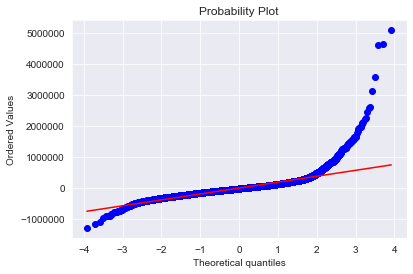

In [18]:
_ = probplot(residuals_log, plot=plt)

### Outliers are removed

In [32]:
import scipy.stats as stats
z_scores = stats.zscore(df_log)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df_log[filtered_entries]

In [33]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13685 entries, 3 to 21596
Data columns (total 22 columns):
price                13685 non-null float64
bedrooms             13685 non-null int64
bathrooms            13685 non-null float64
sqft_living          13685 non-null int64
sqft_lot             13685 non-null int64
floors               13685 non-null float64
waterfront           13685 non-null float64
view                 13685 non-null float64
condition            13685 non-null int64
grade                13685 non-null int64
sqft_above           13685 non-null int64
yr_built             13685 non-null int64
yr_renovated         13685 non-null float64
lat                  13685 non-null float64
long                 13685 non-null float64
sqft_living15        13685 non-null int64
sqft_lot15           13685 non-null int64
log_sqft_above       13685 non-null float64
log_sqft_living      13685 non-null float64
log_sqft_living15    13685 non-null float64
log_sqft_lot         13685 no

In [34]:
y_log_no_out = new_df['price']
X_log_no_out = new_df.drop(['price'], axis = 1)

In [35]:
y_log_no_out.shape

(13685,)

In [37]:
linreg_log_no_out = LinearRegression(fit_intercept = False)
linreg_log_no_out.fit(X_log_no_out, y_log_no_out)
print(linreg_log_no_out.score(X_log_no_out, y_log_no_out))

0.6823485854923232


In [38]:
y_predicted_log_no_out = linreg_log_no_out.predict(X_log_no_out)
y_predicted_log_no_out

array([439216.77615932, 475360.56319595, 212820.762788  , ...,
       393656.34497799, 266514.81428661, 285307.06604474])

In [39]:
residuals_log_no_out = y_log_no_out - y_predicted_log_no_out
residuals_log_no_out.mean()

-12.616309056366786

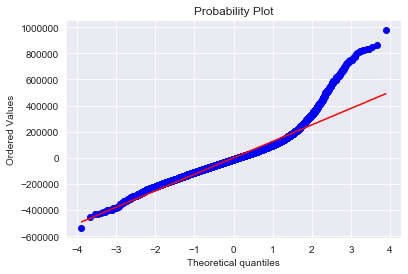

In [40]:
_ = probplot(residuals_log_no_out, plot=plt)